# Searching for the Origin of COVID-19 Coronavirus

Consider the following coronavirus genomes:

1. SARS coronavirus

2. Bat SARS-like coronavirus isolate

3. COVID-19


In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO,AlignIO,Seq

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(40,20),'axes.titlesize':46, 'axes.labelsize':32, 'xtick.labelsize': 24, 'ytick.labelsize': 24})

---

# Comparing using k-mer Composition

Find the normalized frequencies of each distinct 3-mer

## SARS

Using a single complete genome

In [3]:
sars_seq_file = './data/SARSsequence.fasta'

sars_seq = list(SeqIO.parse(sars_seq_file,"fasta"))[0]
print(sars_seq)

ID: DQ182595
Name: DQ182595
Description: DQ182595 |SARS coronavirus ZJ0301 from China| complete genome
Number of features: 0
Seq('TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGA...AGA', SingleLetterAlphabet())


Similar to Lab 3, get all the 3mers in the DNA sequence

In [4]:
trimers = [''.join(word) for word in itertools.product('ACGT',repeat=3)]
print(trimers) # All distinct 3-mers

['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']


In [5]:
def get_normalized_freq(seq,kmers):
    '''Find the normalized frequency of every distinct k-mer for a DNA sequence.'''
    total_kmers = len(seq) - (len(kmers[0]) + 1)
    normalized_freq = [(seq.count(kmer) / total_kmers) for kmer in kmers]
    return normalized_freq

In [6]:
sars_freq = get_normalized_freq(str(sars_seq.seq),trimers)
print(sars_freq)

[0.018045922833479226, 0.01811325836643997, 0.01892128476196889, 0.0218840482122416, 0.024106120799946132, 0.013063093394384216, 0.005218503804457613, 0.02205238704464346, 0.016665544407783988, 0.011817386034610465, 0.013972123089354253, 0.015083159383206517, 0.012827419029021615, 0.011312369537404889, 0.02612618678876843, 0.024409130698269478, 0.024409130698269478, 0.014982156083765403, 0.01491482055080466, 0.018685610396606288, 0.01333243552622719, 0.0042421385765268336, 0.0030300989832334523, 0.011615379435728233, 0.004713487307252037, 0.0042421385765268336, 0.0027607568513904786, 0.0071375664938387985, 0.01871927816308666, 0.011615379435728233, 0.018954952528449264, 0.02407245303346576, 0.015285165982088749, 0.012322402531816039, 0.01252440913069827, 0.015588175880412093, 0.014477139586559828, 0.007844589589926605, 0.004679819540771665, 0.020941350750791194, 0.01175005050164972, 0.009864655578748906, 0.004309474109487577, 0.01390478755639351, 0.014746481718402801, 0.009999326644670

Graph normalized frequencies

,Trimer,Normalized Frequency
0,AAA,0.018046
1,AAC,0.018113
2,AAG,0.018921
3,AAT,0.021884
4,ACA,0.024106
...,...,...
59,TGT,0.024712
60,TTA,0.023096
61,TTC,0.018955
62,TTG,0.026126


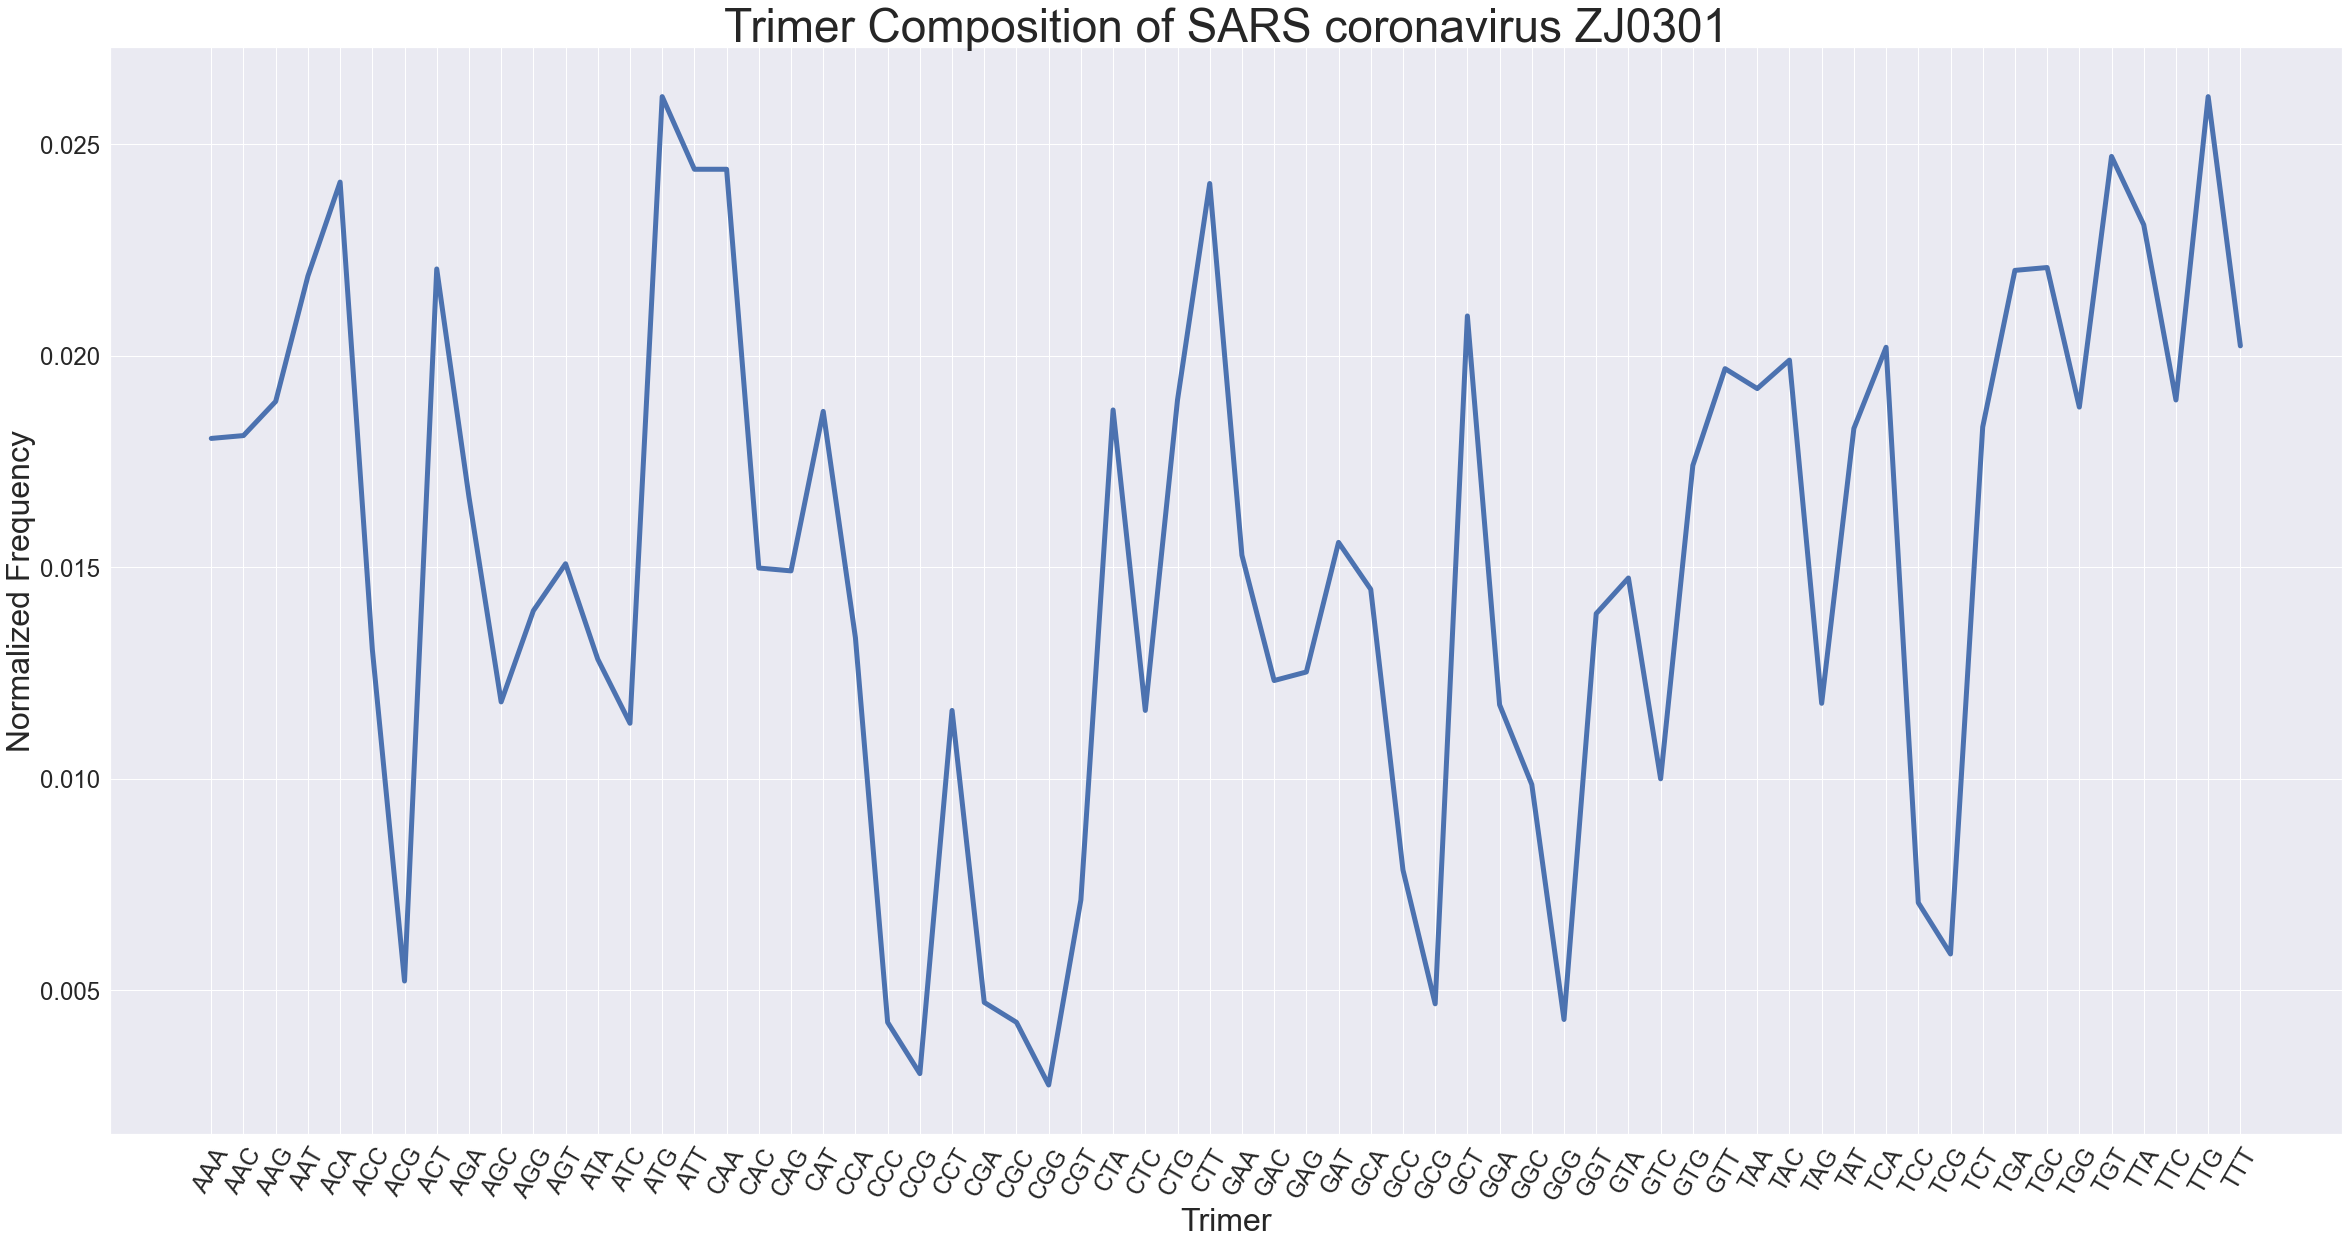

In [7]:
sars_df = pd.DataFrame({'Trimer':trimers,'Normalized Frequency':sars_freq})
display(sars_df)

plt.xticks(rotation=60)
sars_plt = sns.lineplot(x='Trimer', y='Normalized Frequency', lw=5, data=sars_df)
sars_plt.axes.set_title('Trimer Composition of SARS coronavirus ZJ0301');

## Bat SARS-like Coronavirus Isolate (bat-SL-CoVZC45)

Using a single complete genome

In [8]:
bat_seq_file = './data/bat-SL-CoVZC45sequence.fasta'

bat_seq = list(SeqIO.parse(bat_seq_file,"fasta"))[0]
print(bat_seq)

ID: MG772933.1
Name: MG772933.1
Description: MG772933.1 Bat SARS-like coronavirus isolate bat-SL-CoVZC45, complete genome
Number of features: 0
Seq('ATATTAGGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [9]:
bat_freq = get_normalized_freq(str(bat_seq.seq),trimers)
print(bat_freq)

[0.020471172561916908, 0.019162359889925498, 0.019028122692798174, 0.024464729176454796, 0.023793543190818174, 0.012517618632122961, 0.00640982616282972, 0.022417611920263106, 0.018692529699979865, 0.0100677897845493, 0.012249144237868314, 0.01681320894019733, 0.014866769581851132, 0.010940331565876904, 0.024062017585072825, 0.02567286395060071, 0.02288744211020874, 0.014698973085441975, 0.014665413786160144, 0.016376938049533527, 0.012416940734277468, 0.0036244043224377474, 0.002986777636082959, 0.010738975770185918, 0.003926438015974226, 0.0036244043224377474, 0.0031545741324921135, 0.006141351768575072, 0.017618632122961272, 0.00943016309819451, 0.017283039130142962, 0.02527015235921874, 0.017283039130142962, 0.011980669843613666, 0.011041009463722398, 0.014698973085441975, 0.013356601114168736, 0.00640982616282972, 0.0031545741324921135, 0.018021343714343243, 0.010604738573058594, 0.008121350426203102, 0.004295590308074367, 0.01516880327538761, 0.015638633465333243, 0.0095308409960

,Trimer,Normalized Frequency
0,AAA,0.020471
1,AAC,0.019162
2,AAG,0.019028
3,AAT,0.024465
4,ACA,0.023794
...,...,...
59,TGT,0.026277
60,TTA,0.027720
61,TTC,0.018659
62,TTG,0.027149


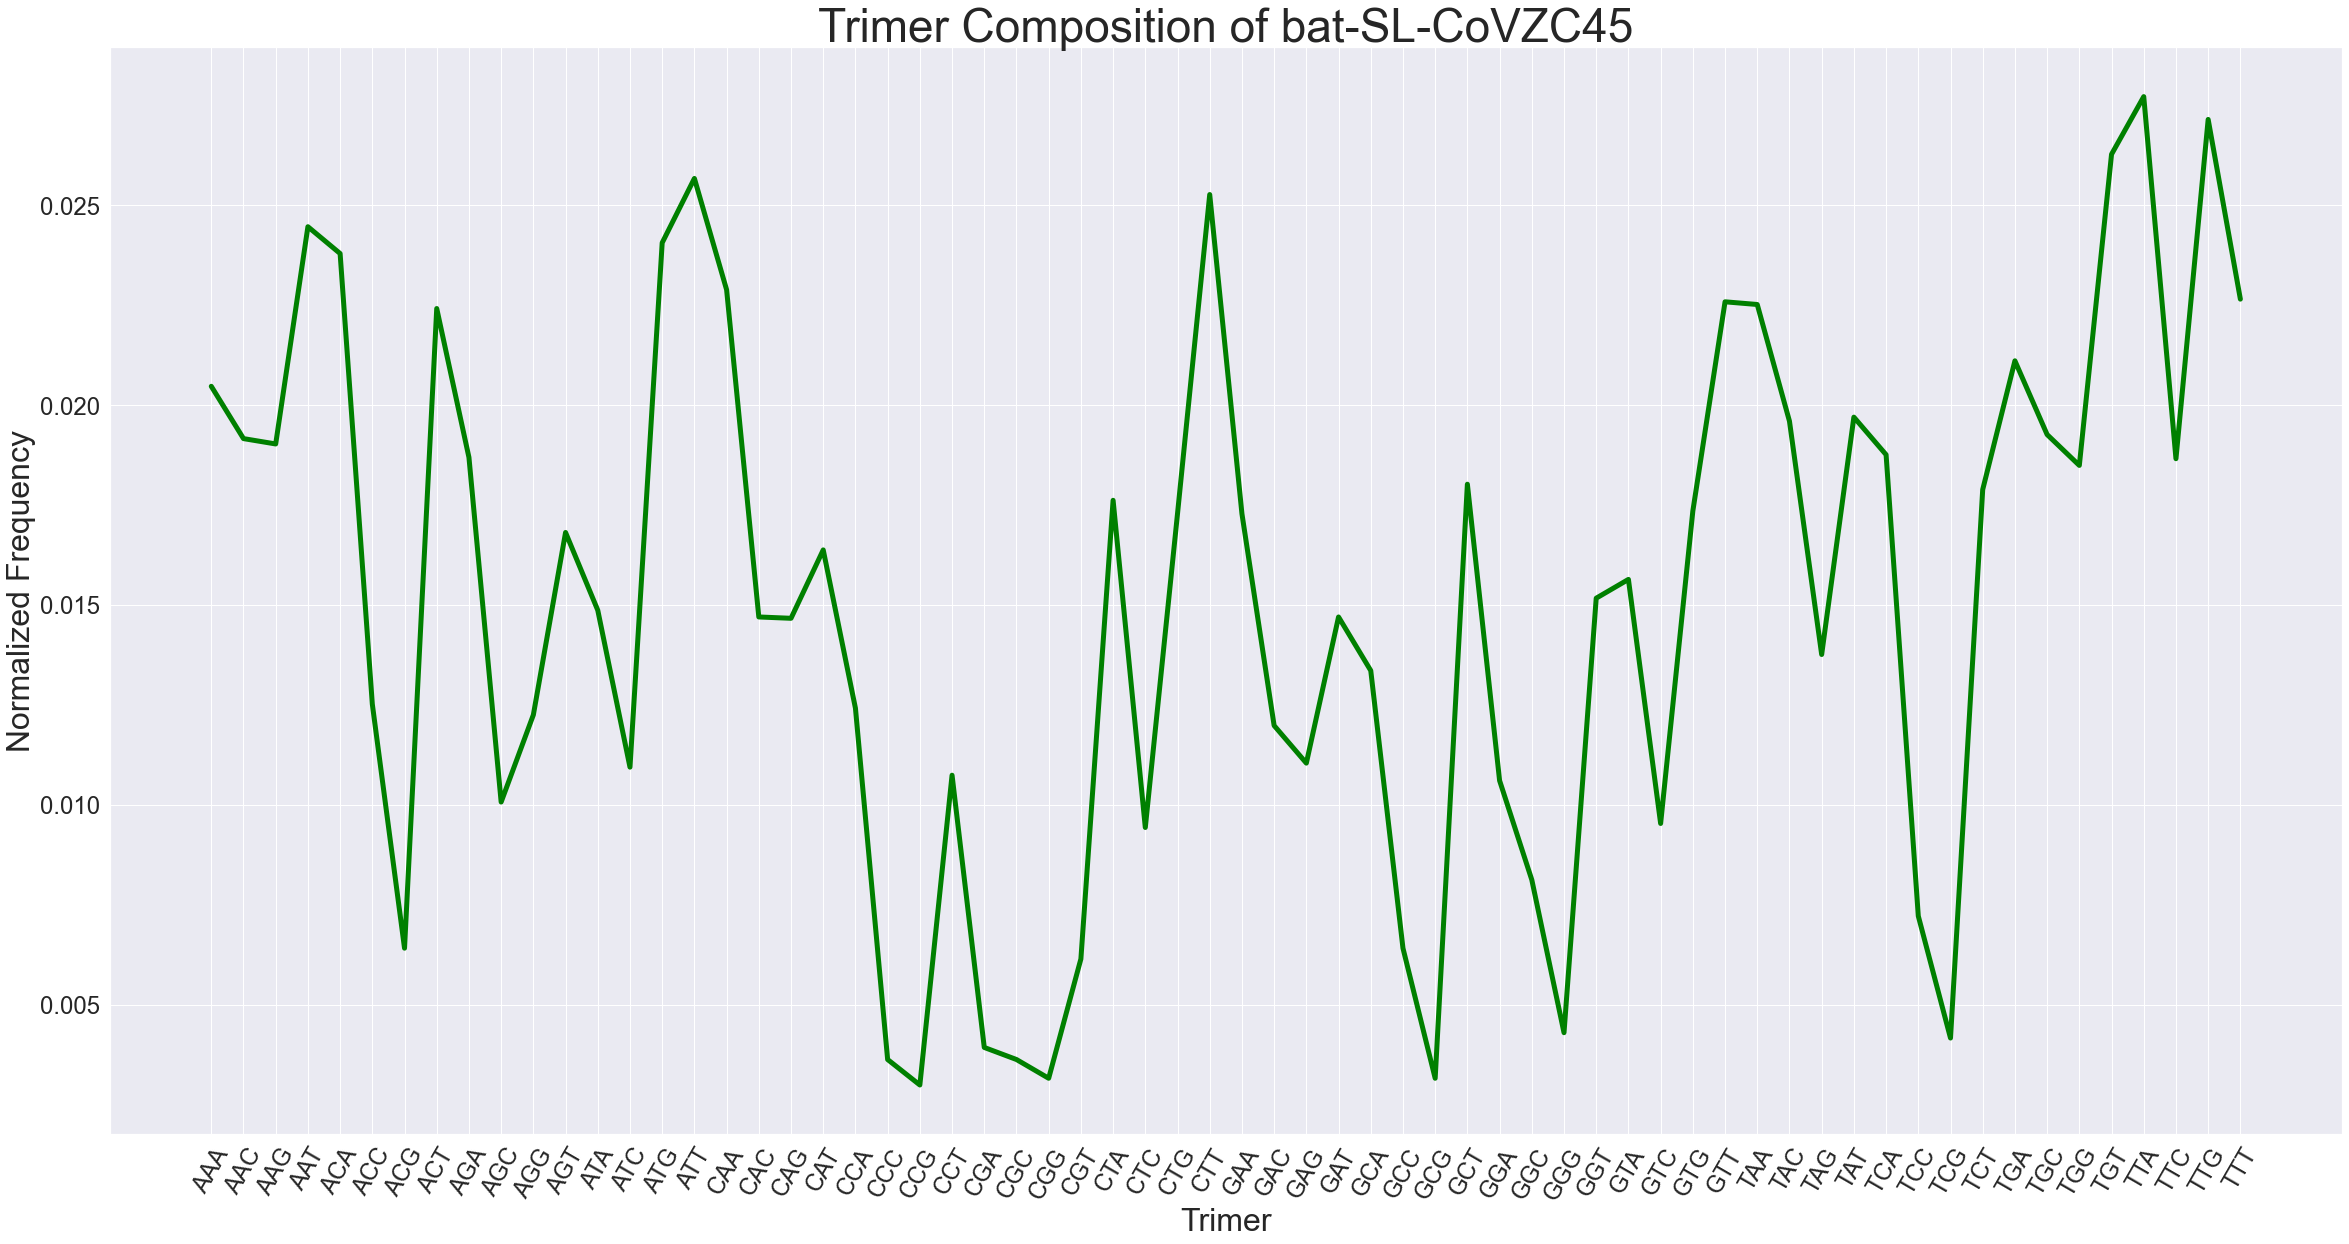

In [10]:
bat_df = pd.DataFrame({'Trimer':trimers,'Normalized Frequency':bat_freq})
display(bat_df)

plt.xticks(rotation=60)
bat_plt = sns.lineplot(x='Trimer', y='Normalized Frequency', lw=5, color='green', data=bat_df)
bat_plt.axes.set_title('Trimer Composition of bat-SL-CoVZC45');

## COVID-19

Using complete genome (reference sequence)

In [11]:
cov_seq_file = './data/COVID19refsequence.fasta'

cov_seq = list(SeqIO.parse(cov_seq_file,"fasta"))[0]
print(cov_seq)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [12]:
cov_freq = get_normalized_freq(str(cov_seq.seq),trimers)
print(cov_freq)

[0.02187364125890498, 0.020569249807685874, 0.019398642095053348, 0.025452356266095856, 0.025251680658215994, 0.012575671427138032, 0.0054851332820495665, 0.022542559951837855, 0.01906418274858691, 0.010067226328639755, 0.011003712498745778, 0.016957088865848357, 0.014983778721696378, 0.011338171845212214, 0.02424830261881668, 0.02585370748185558, 0.02351249205659052, 0.014247968159470216, 0.01464931937522994, 0.01618783236897555, 0.01183986086491187, 0.0034114853339576577, 0.002474999163851634, 0.011505401518445433, 0.0031773637914311514, 0.003143917856784508, 0.0025418910331449214, 0.005719254824576072, 0.018763169336767117, 0.008996956419947156, 0.016555737650088633, 0.02468309976922305, 0.01789357503595438, 0.011371617779858859, 0.009431753570353524, 0.014716211244523228, 0.012441887688551456, 0.006254389778922372, 0.0028429044449647146, 0.017425331950901367, 0.009431753570353524, 0.007458443426201545, 0.003980066222950601, 0.01518445432957624, 0.015686143349275896, 0.0089969564199

,Trimer,Normalized Frequency
0,AAA,0.021874
1,AAC,0.020569
2,AAG,0.019399
3,AAT,0.025452
4,ACA,0.025252
...,...,...
59,TGT,0.026790
60,TTA,0.029299
61,TTC,0.017325
62,TTG,0.027325


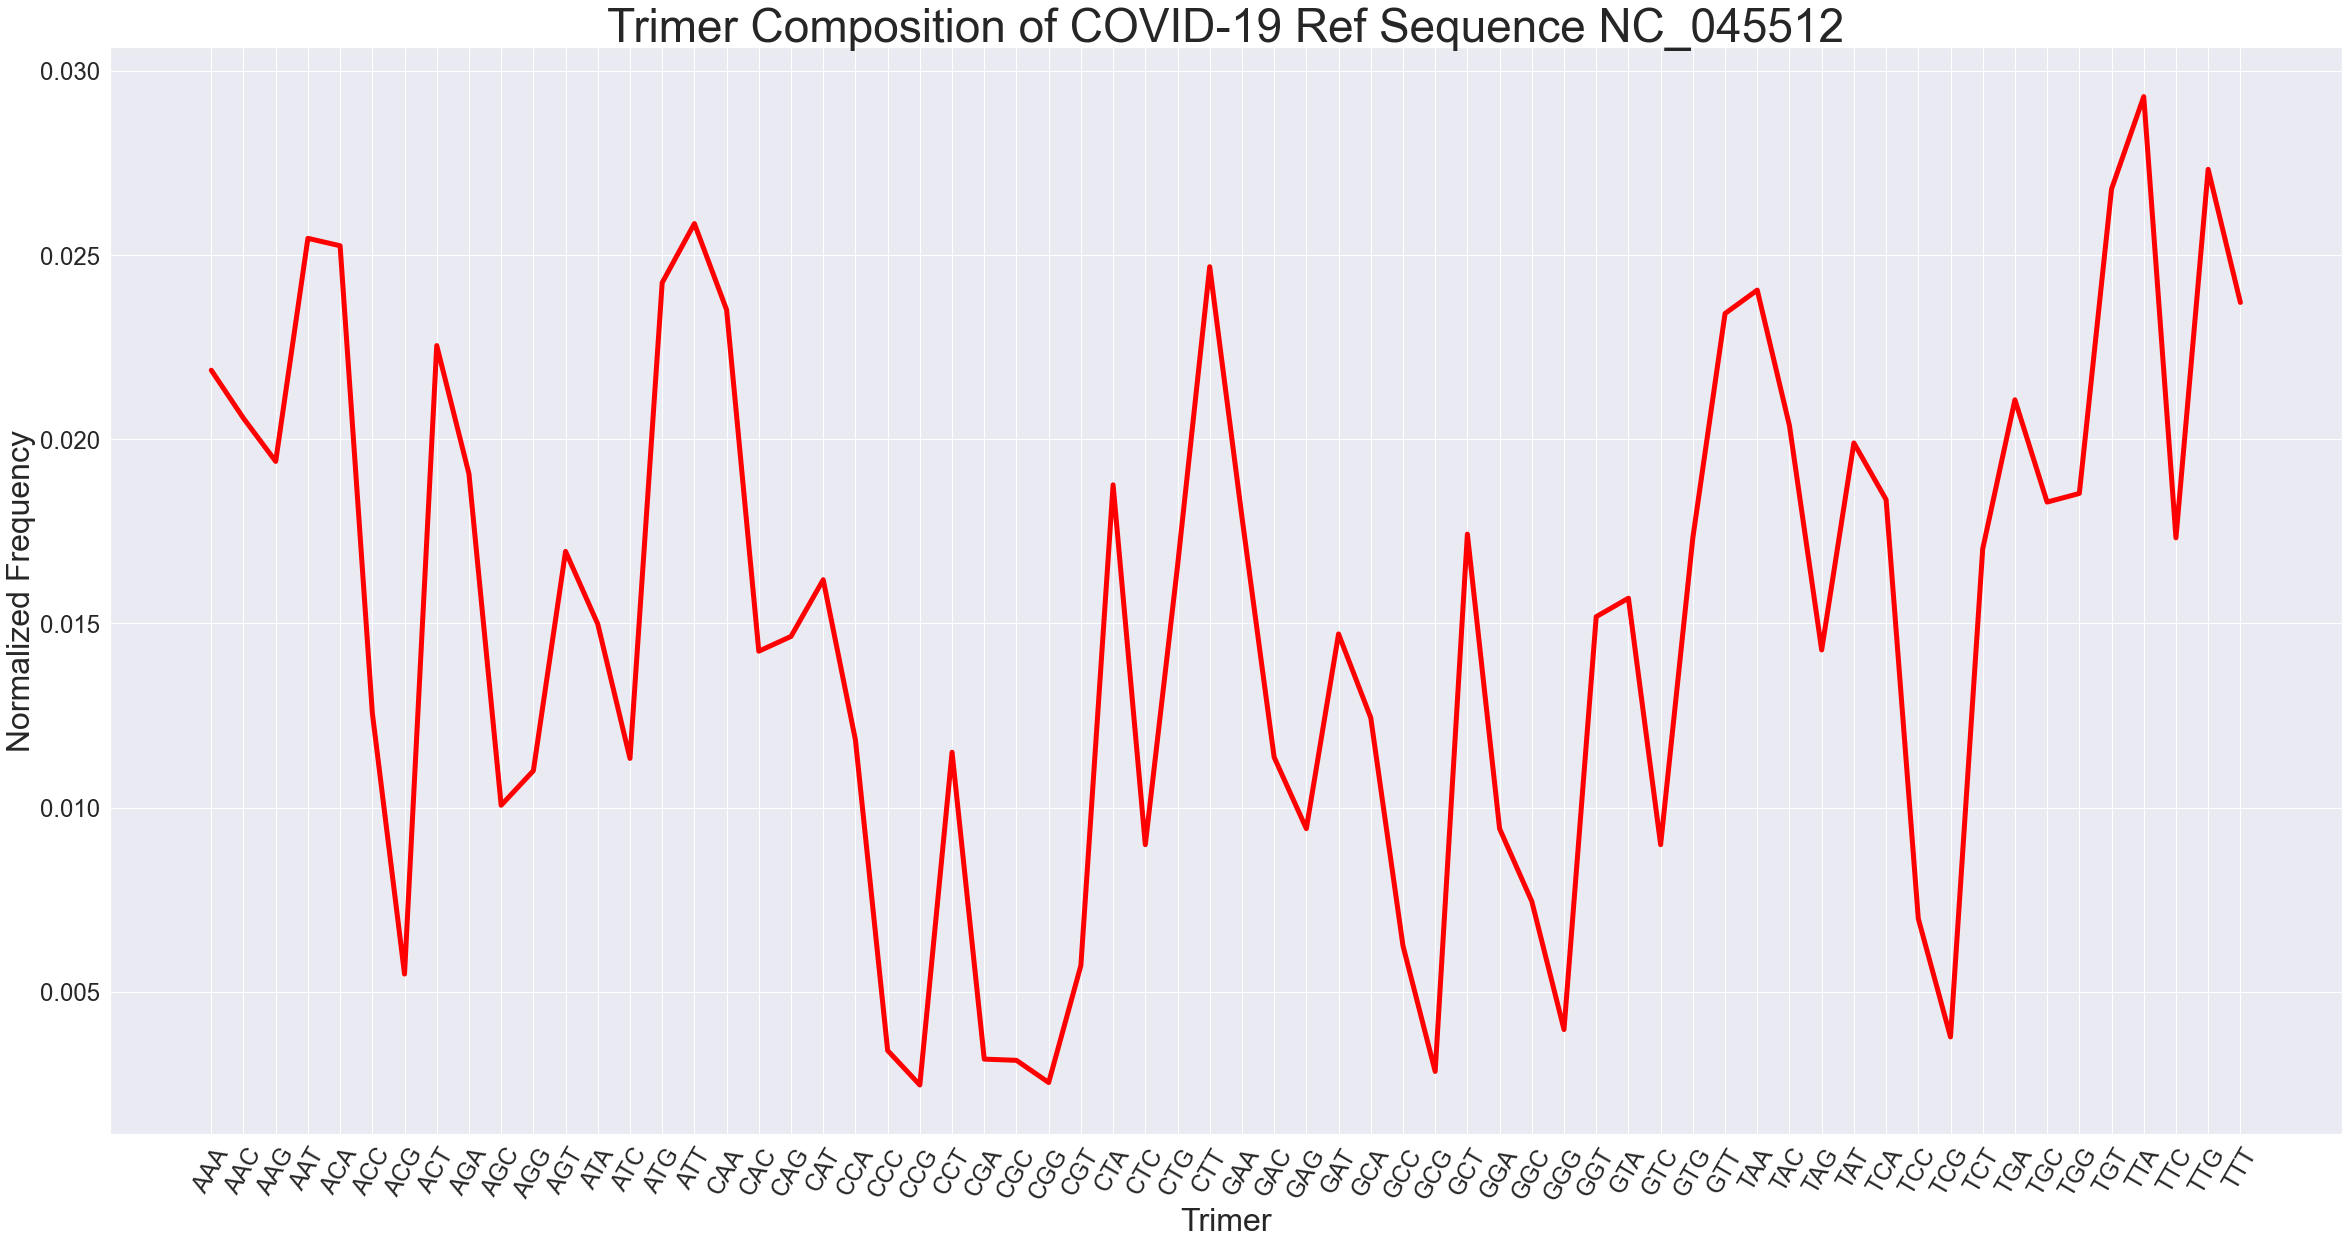

In [13]:
cov_df = pd.DataFrame({'Trimer':trimers,'Normalized Frequency':cov_freq})
display(cov_df)

plt.xticks(rotation=60)
cov_plt = sns.lineplot(x='Trimer', y='Normalized Frequency', lw=5, color='red', data=cov_df)
cov_plt.axes.set_title('Trimer Composition of COVID-19 Ref Sequence NC_045512');

---

# Comparing/Overlapping All 3 Trimer Compositions

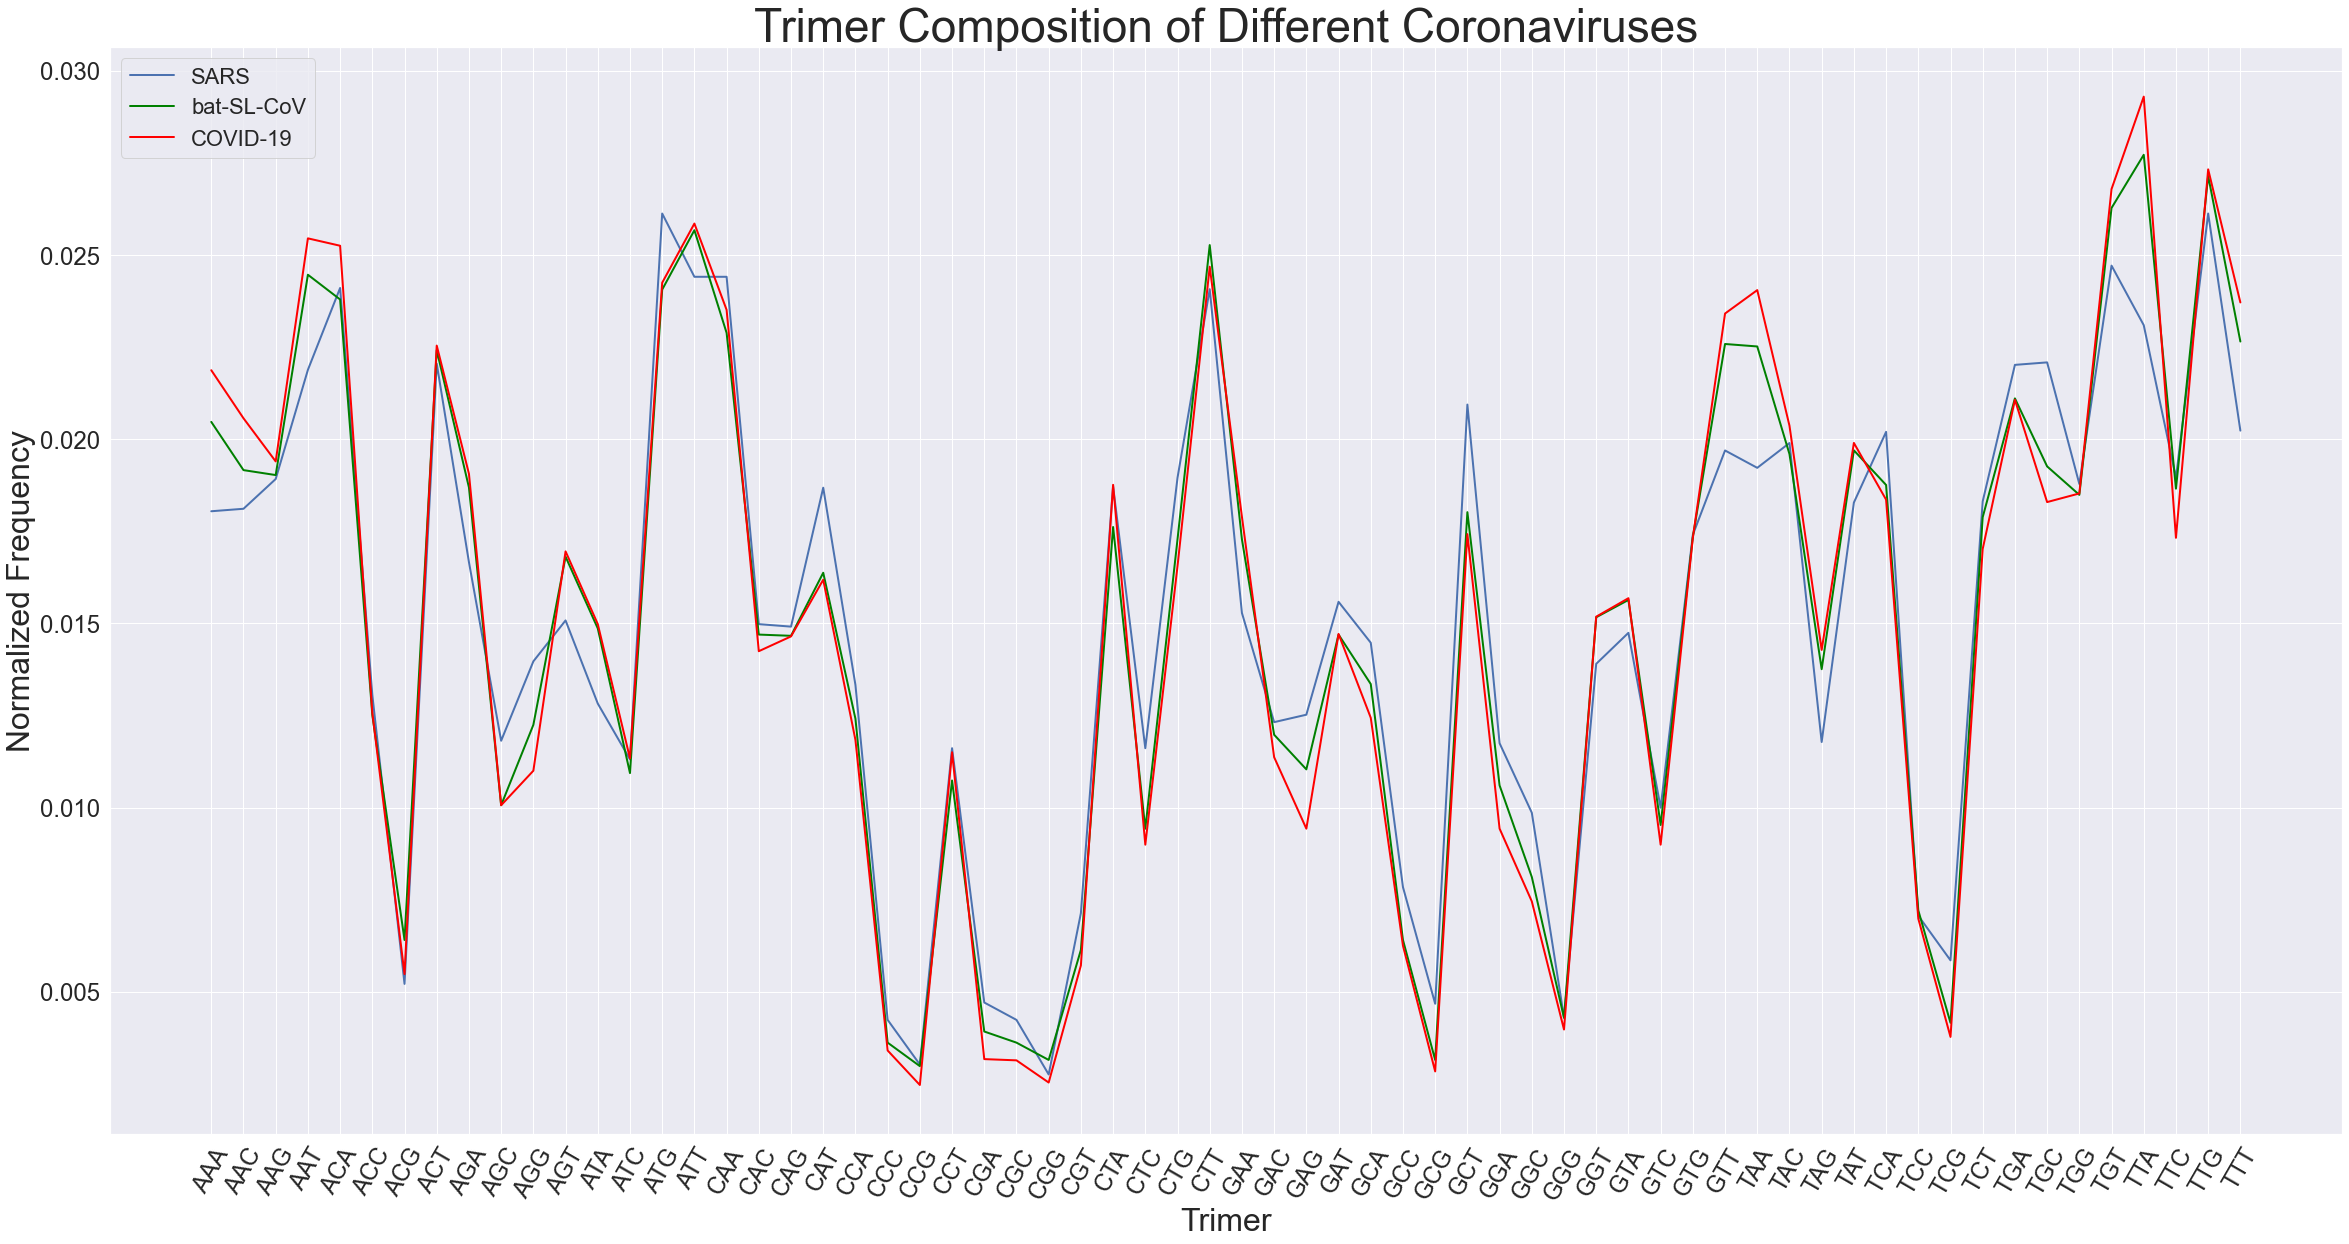

In [14]:
plt.xticks(rotation=60)
sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, label='SARS', data=sars_df)
sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, color='green', label='bat-SL-CoV', data=bat_df)
full_plt = sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, color='red', label='COVID-19', data=cov_df)
full_plt.axes.set_title('Trimer Composition of Different Coronaviruses')
full_plt.legend(fontsize=22);

From looking at this final graph, you can see very similar genome patterns among the 3 viruses. 

What's even more noteworthy is how the bat-SL-CoV virus is much more similar to COVID-19 than the SARS strand is. This could line up with the idea that COVID-19 was contracted from bats.

---

# Comparing COVID-19 to non-coronavirus diseases

I also wanted to take a look at how the 3-mer composition of COVID-19 relates to other diseases. This includes chicken pox, a viral disease that is not a coronavirus, and tuberculosis, a bacterial disease.

In [16]:
tb_seq_file = './data/TBsequence.fasta'

tb_seq = list(SeqIO.parse(tb_seq_file,"fasta"))[0]
print(tb_seq)

ID: AL123456.3
Name: AL123456.3
Description: AL123456.3 Mycobacterium tuberculosis H37Rv complete genome
Number of features: 0
Seq('TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGGTCGTCTCC...TCG', SingleLetterAlphabet())


In [17]:
hhv_seq_file = './data/HHV3sequence.fasta'

hhv_seq = list(SeqIO.parse(hhv_seq_file,"fasta"))[0]
print(hhv_seq)

ID: NC_001348.1
Name: NC_001348.1
Description: NC_001348.1 Human herpesvirus 3, complete genome
Number of features: 0
Seq('AGGCCAGCCCTCTCGCGGCCCCCTCGAGAGAGAAAAAAAAAAGCGACCCCACCT...AGG', SingleLetterAlphabet())


In [18]:
tb_freq = get_normalized_freq(str(tb_seq.seq),trimers)
hhv_freq = get_normalized_freq(str(hhv_seq.seq),trimers)

tb_df = pd.DataFrame({'Trimer':trimers,'Normalized Frequency':tb_freq})
hhv_df = pd.DataFrame({'Trimer':trimers,'Normalized Frequency':hhv_freq})

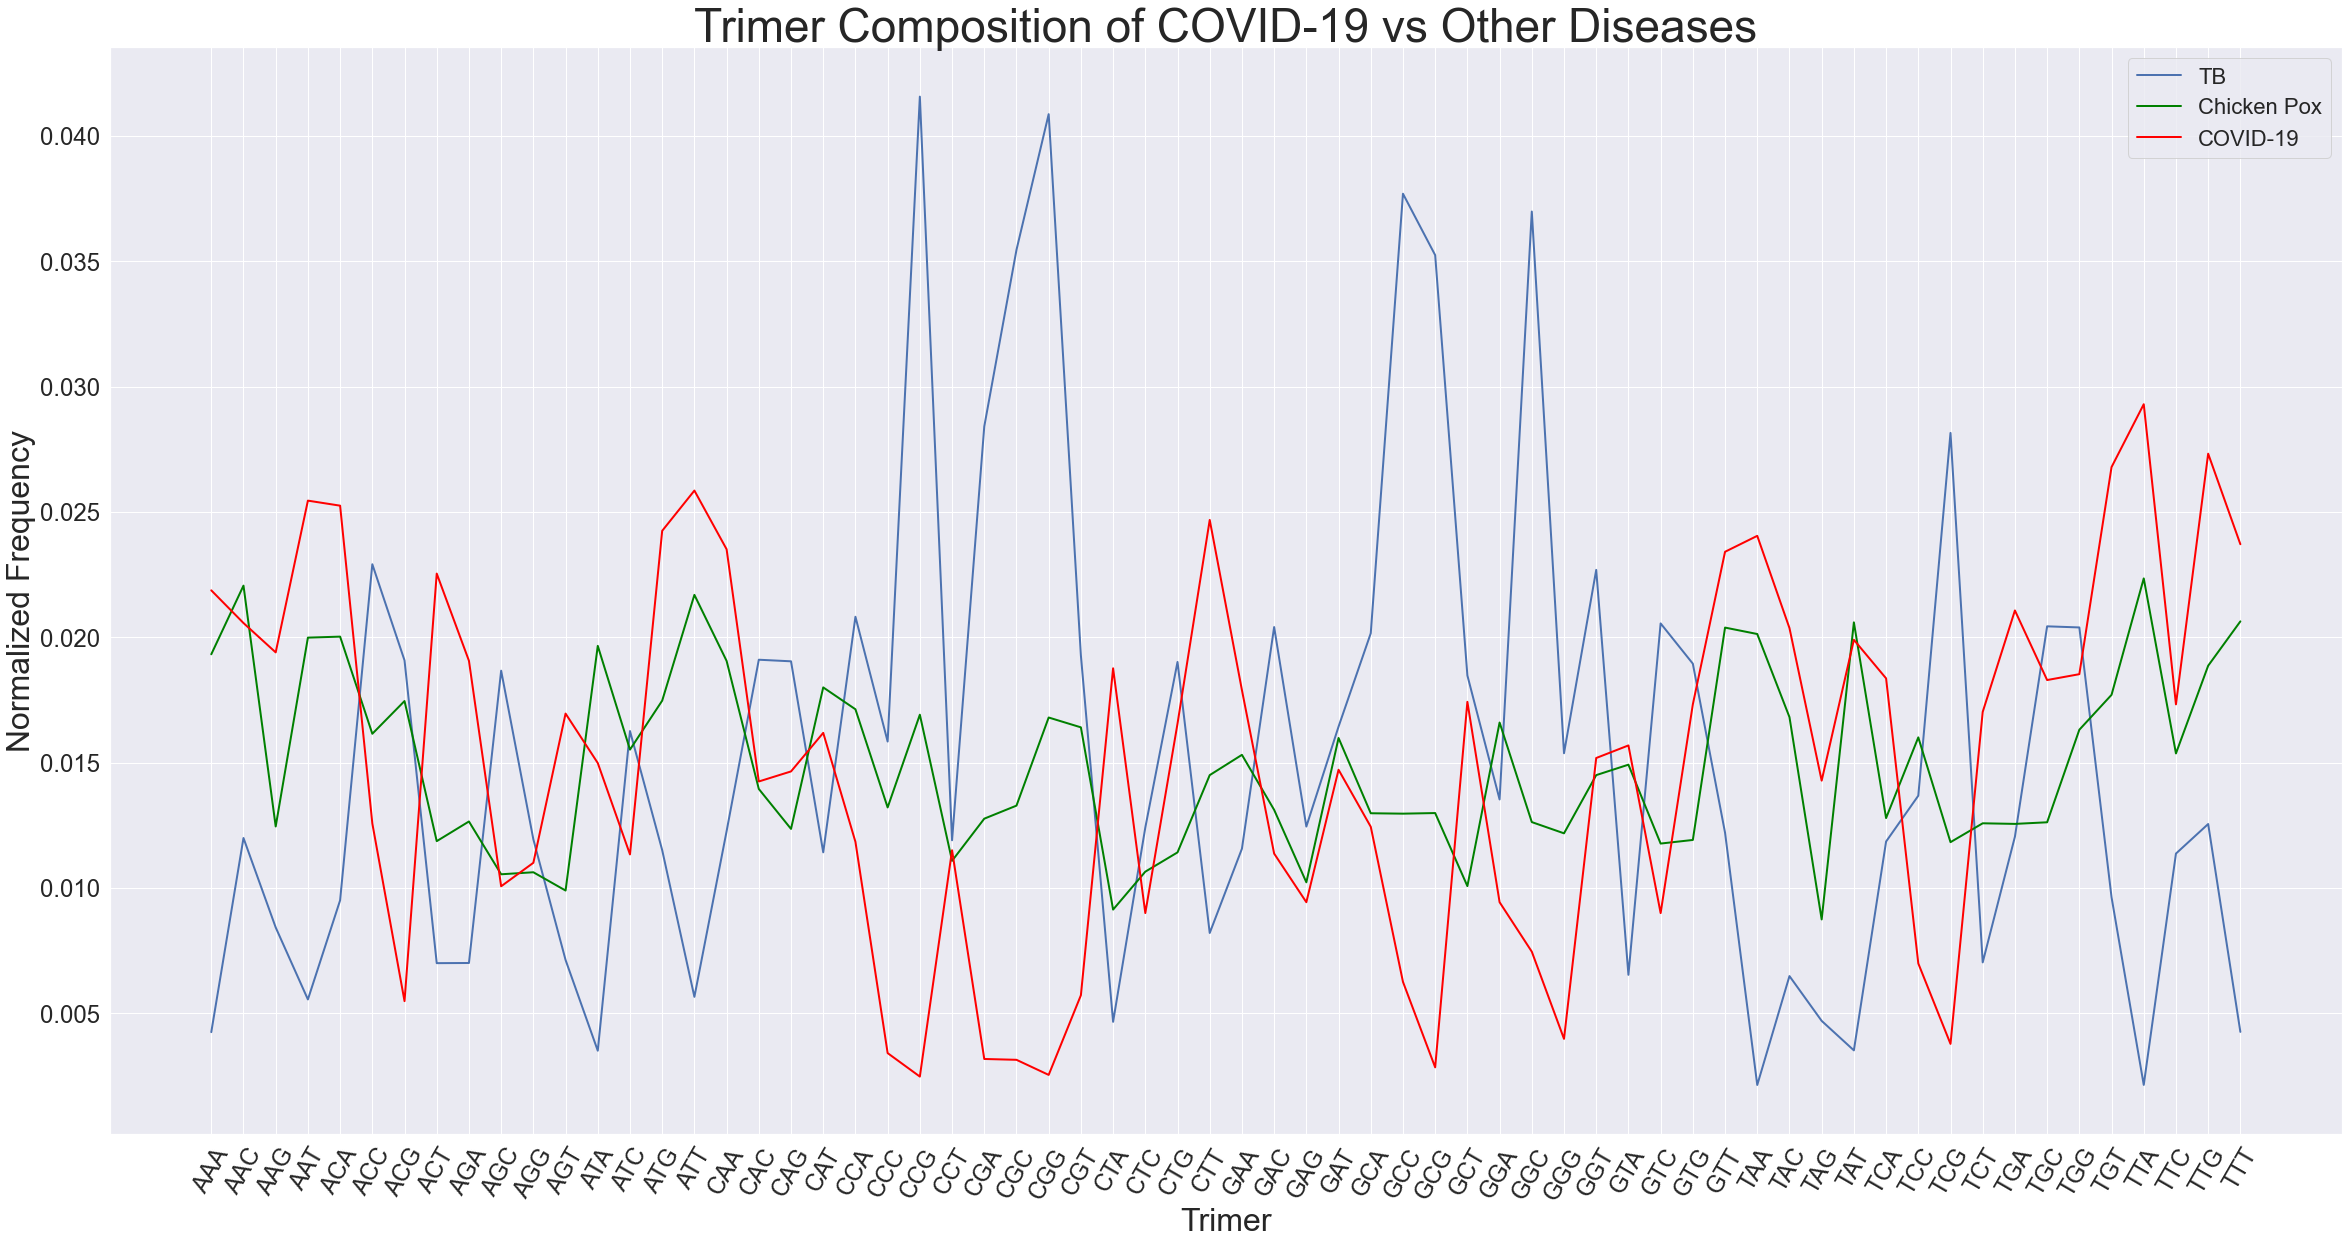

In [19]:
plt.xticks(rotation=60)
sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, label='TB', data=tb_df)
sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, color='green', label='Chicken Pox', data=hhv_df)
full_plt = sns.lineplot(x='Trimer', y='Normalized Frequency', lw=2, color='red', label='COVID-19', data=cov_df)
full_plt.axes.set_title('Trimer Composition of COVID-19 vs Other Diseases')
full_plt.legend(fontsize=22);

Now comparing this to the other graph, it's clear that even another kind of virus is completely different when comparing nucleotide composition.